In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('US_Accidents.csv')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
#Dataset Overview and Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [11]:
df.shape

(7728394, 46)

In [7]:
# Descriptive Statistics
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [8]:
# List of Column Names
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [10]:
# Identify Duplicate Rows
df.duplicated().sum()

np.int64(0)

In [12]:
city_by_accidents = df['City'].value_counts()
df['City'].value_counts()

City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
                ...  
Saint Croix         1
Masardis            1
Okaton              1
Wasta               1
Adell               1
Name: count, Length: 13678, dtype: int64

The above list depicts that Miami City has the highest accidents compared to other cities. Miami is followed by Houstan, Los Angeles, Charlotte, etc.5

C:\Users\rohan\AppData\Local\Temp\ipykernel_5976\4283592818.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_counties.values, y=top_10_counties.index, palette='viridis')


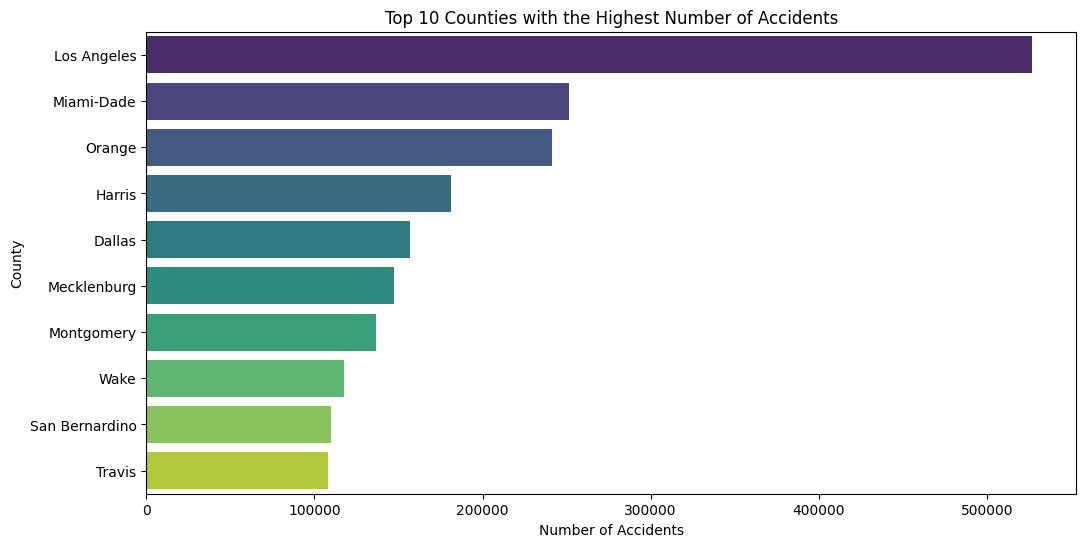

In [19]:
# Top 10 counties with the highest number of accidents
top_10_counties = df['County'].value_counts().nlargest(10)

# Plotting top 10 counties with the highest number of accidents
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_counties.values, y=top_10_counties.index, palette='viridis')
plt.title('Top 10 Counties with the Highest Number of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('County')
plt.show()

The high incidence of accidents in Los Angeles, Miami-Dade, and Orange Counties can be attributed to dense populations, extensive road networks, heavy traffic volumes, and diverse driving behaviors, contributing to increased collision risks in these urbanized and heavily traveled regions.

C:\Users\rohan\AppData\Local\Temp\ipykernel_5976\1367899701.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_states.values, y=top_10_states.index, palette='viridis')


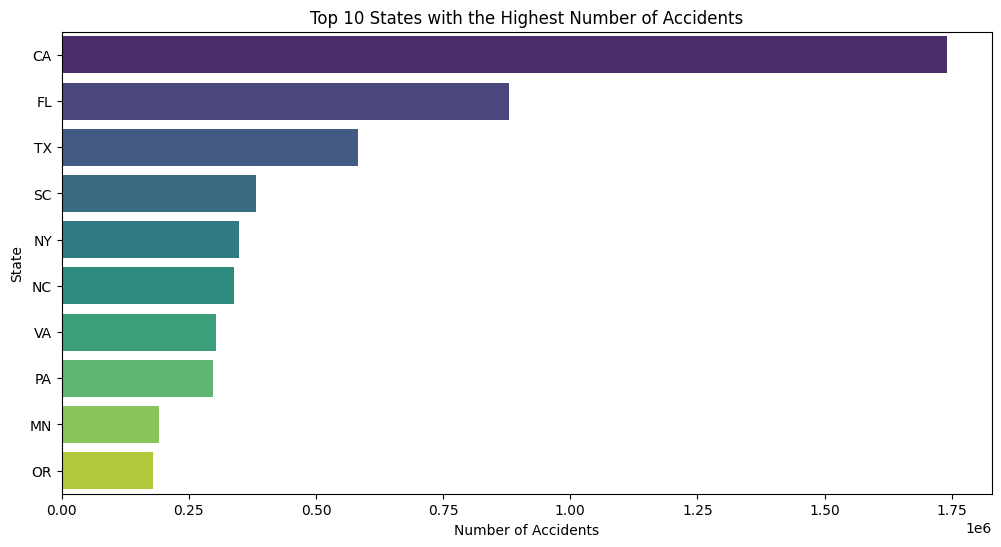

In [20]:
# Top 10 states with the highest number of accidents
top_10_states = df['State'].value_counts().nlargest(10)

# Plotting top 10 states with the highest number of accidents
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_states.values, y=top_10_states.index, palette='viridis')
plt.title('Top 10 States with the Highest Number of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.show()

The high incidence of accidents in California, Florida, Texas, and South Carolina is likely due to several factors: dense population centers leading to increased vehicle traffic, diverse weather conditions affecting road safety, and extensive highway networks prone to congestion and varying levels of maintenance.

C:\Users\rohan\AppData\Local\Temp\ipykernel_5976\4007727971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=road_conditions_counts.values, y=road_conditions_counts.index, palette='coolwarm')


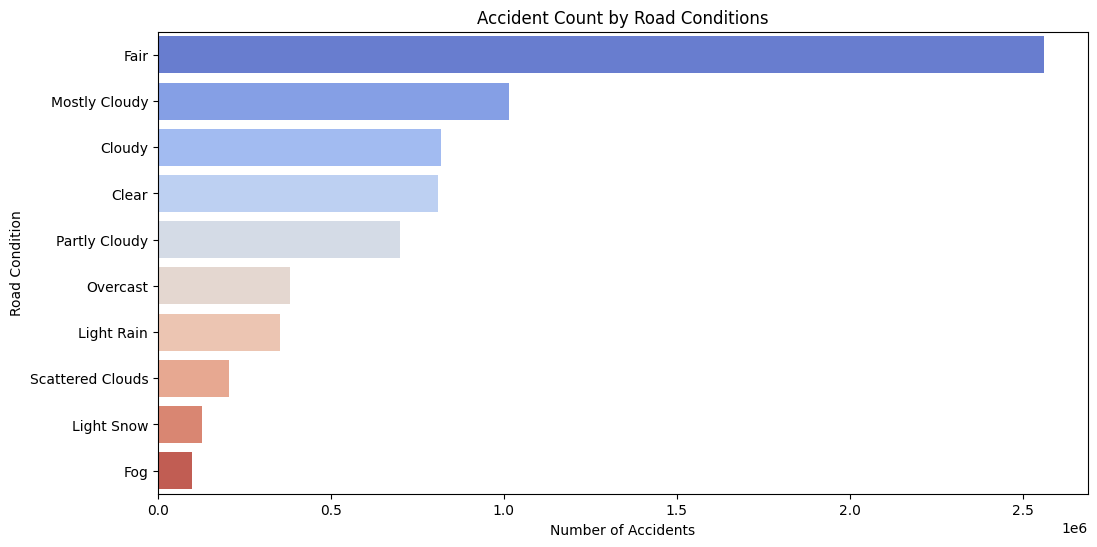

In [21]:
# Accident count by road conditions
road_conditions_counts = df['Weather_Condition'].value_counts().nlargest(10)  

# Plotting accident count by road conditions
plt.figure(figsize=(12, 6))
sns.barplot(x=road_conditions_counts.values, y=road_conditions_counts.index, palette='coolwarm')
plt.title('Accident Count by Road Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Road Condition')
plt.show()

The above bar graph shows that the most accidents occur on fair road conditions. Fair implies the road condition is neither in optimal condition nor in poor condition. It may have minor cracks, small potholes, or slight unevenness.

C:\Users\rohan\AppData\Local\Temp\ipykernel_5976\3608228459.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traffic_control_counts.values, y=traffic_control_counts.index, palette='viridis')


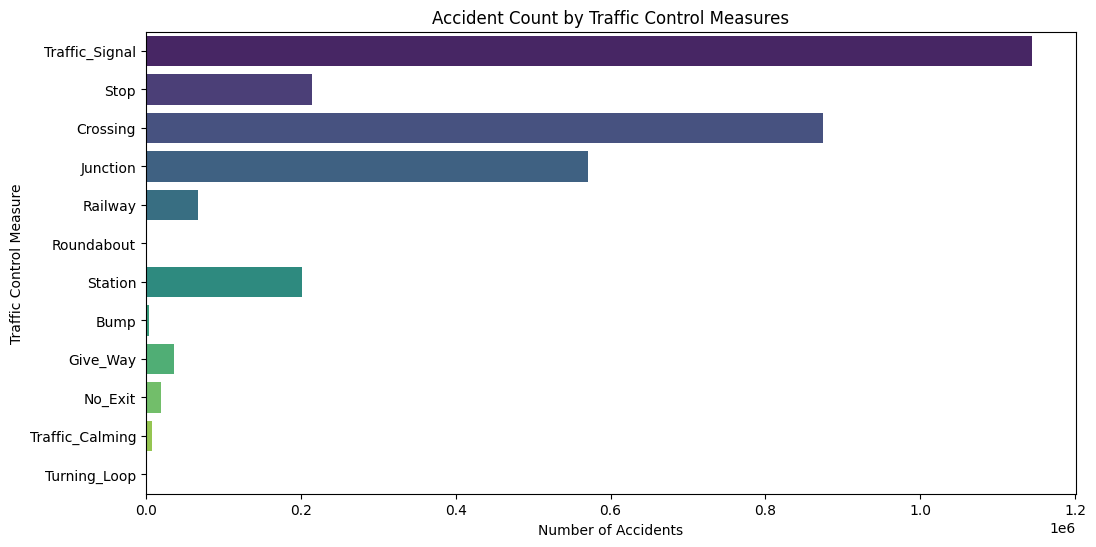

In [22]:
# Accident count by the presence of traffic control measures
traffic_measures = ['Traffic_Signal', 'Stop', 'Crossing', 'Junction', 'Railway', 'Roundabout', 'Station', 'Bump', 'Give_Way', 'No_Exit', 'Traffic_Calming', 'Turning_Loop']
traffic_control_counts = df[traffic_measures].sum()

# Plotting accident count by traffic control measures
plt.figure(figsize=(12, 6))
sns.barplot(x=traffic_control_counts.values, y=traffic_control_counts.index, palette='viridis')
plt.title('Accident Count by Traffic Control Measures')
plt.xlabel('Number of Accidents')
plt.ylabel('Traffic Control Measure')
plt.show()


 In the US, most accidents occur near traffic signals, followed by road crossings. This is often because people do not follow the traffic signal.

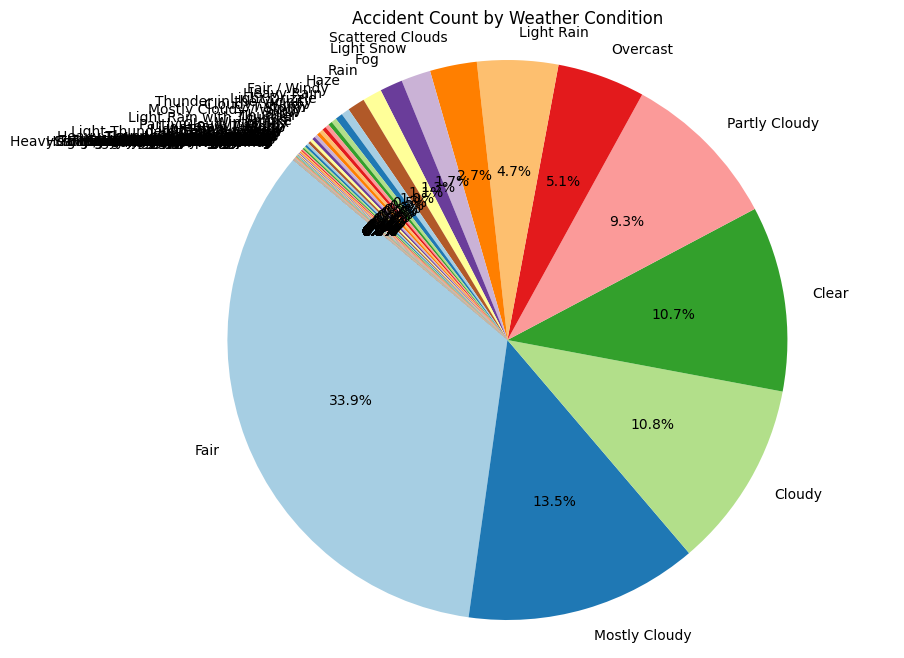

In [23]:
# Accident count by weather conditions
weather_conditions_counts = df['Weather_Condition'].value_counts()

# Plotting accident count by weather conditions using a pie chart
plt.figure(figsize=(10, 8))
plt.pie(weather_conditions_counts.values, labels=weather_conditions_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Accident Count by Weather Condition')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Most accidents in the US occur in fair weather conditions followed by mostly cloudy weather because drivers tend to be less cautious and more prone to distractions when road and weather conditions seem safe. 

In [25]:
# Convert Start_Time to datetime with error handling
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Drop rows with NaT in Start_Time
df = df.dropna(subset=['Start_Time'])

# Extract hour from Start_Time
df['Hour'] = df['Start_Time'].dt.hour

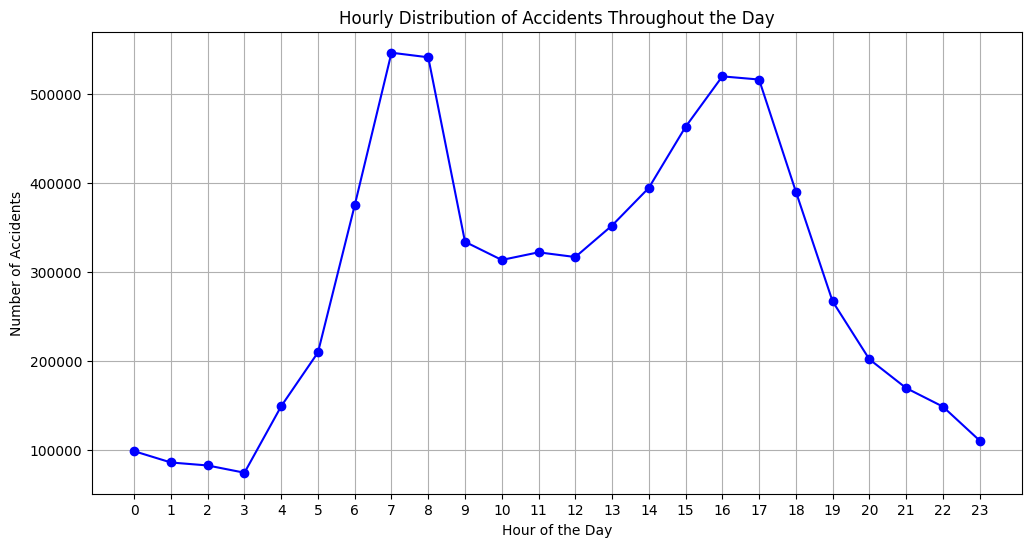

In [26]:
# Hourly distribution of accidents
hourly_accidents = df['Hour'].value_counts().sort_index()

# Plotting hourly distribution of accidents using a line plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_accidents.index, hourly_accidents.values, marker='o', linestyle='-', color='b')
plt.title('Hourly Distribution of Accidents Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Most accidents in the US occur between 7 to 8 AM and 4 to 5 PM due to increased traffic during morning and evening rush hours, as people commute to and from work, leading to higher congestion and potential for collisions.

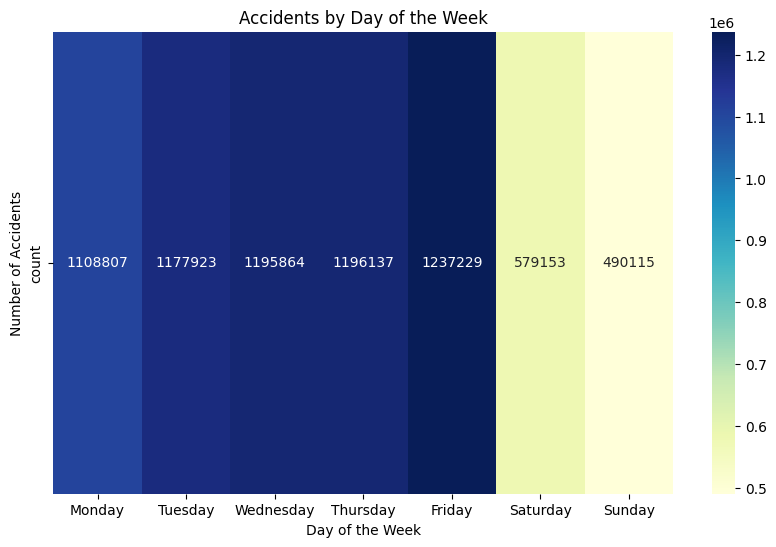

In [28]:
# Convert Start_Time to datetime with error handling
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Drop rows with NaT in Start_Time
df = df.dropna(subset=['Start_Time'])

# Extract day of the week from Start_Time
df['Day_of_Week'] = df['Start_Time'].dt.day_name()

# Count accidents by day of the week
day_of_week_counts = df['Day_of_Week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting accidents by day of the week using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(day_of_week_counts.to_frame().T, cmap='YlGnBu', annot=True, fmt='d')
plt.title('5')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()


In the above heatmap representation, darker colors typically indicate areas or points where there is a higher concentration or frequency of accidents. Accidents are more frequent on Fridays in the US primarily due to increased traffic volume as people commute home or travel for the weekend, coupled with potential fatigue from the workweek, leading to decreased vigilance and heightened risk of collisions. 

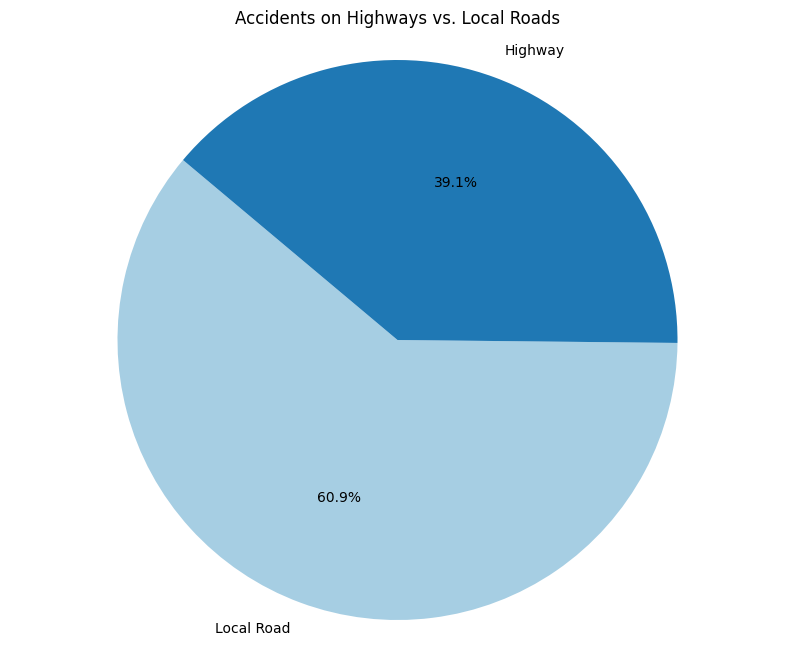

In [29]:
# Fill NaN values in 'Description' with an empty string
df['Description'] = df['Description'].fillna('')

df['Road_Type'] = df['Description'].apply(lambda x: 'Highway' if 'Hwy' in x or 'I-' in x or 'Interstate' in x else 'Local Road')

# Count accidents on highways vs. local roads
road_type_counts = df['Road_Type'].value_counts()

# Plotting accidents on highways vs. local roads using a pie chart
plt.figure(figsize=(10, 8))
plt.pie(road_type_counts.values, labels=road_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Accidents on Highways vs. Local Roads')
plt.axis('equal') 
plt.show()




Most accidents in the US occur on local roads due to their higher density of intersections, pedestrian crossings, and variable speed limits, which increase the likelihood of collisions compared to highways. 

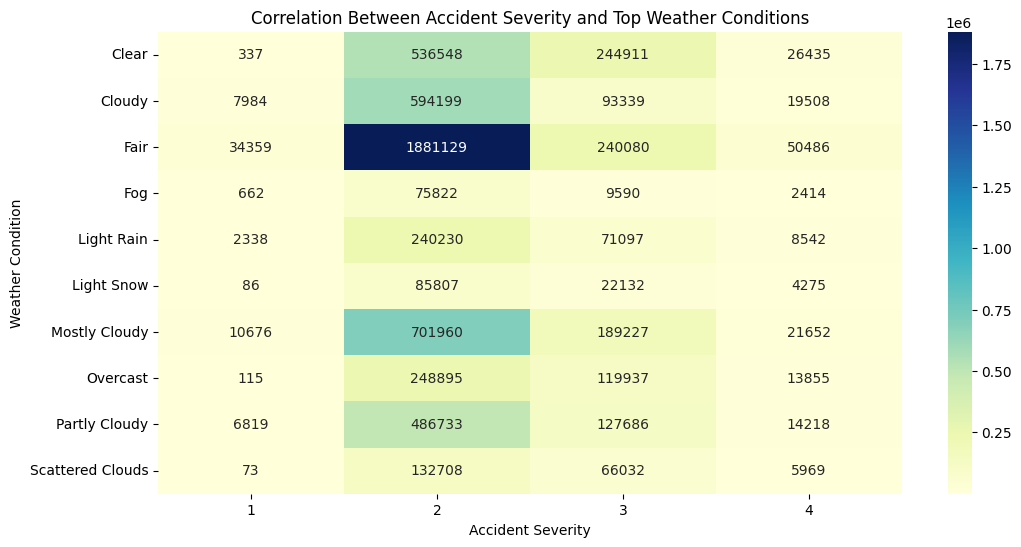

In [32]:
# Correlation between accident severity and weather conditions
severity_weather_condition = df[['Severity', 'Weather_Condition']].dropna()

# Filter for top 10 most common weather conditions
top_weather_conditions = severity_weather_condition['Weather_Condition'].value_counts().nlargest(10).index
filtered_data = severity_weather_condition[severity_weather_condition['Weather_Condition'].isin(top_weather_conditions)]

# Create a pivot table
weather_condition_pivot = filtered_data.pivot_table(index='Weather_Condition', columns='Severity', aggfunc='size', fill_value=0)

# Plotting the correlation using a simplified heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(weather_condition_pivot, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Correlation Between Accident Severity and Top Weather Conditions')
plt.xlabel('Accident Severity')
plt.ylabel('Weather Condition')
plt.show()

Accident severity is higher in the US during fair weather conditions due to increased vehicle speeds, reduced caution from drivers, and a false sense of security leading to more severe outcomes in the event of a collision compared to adverse weather conditions where drivers may be more cautious.

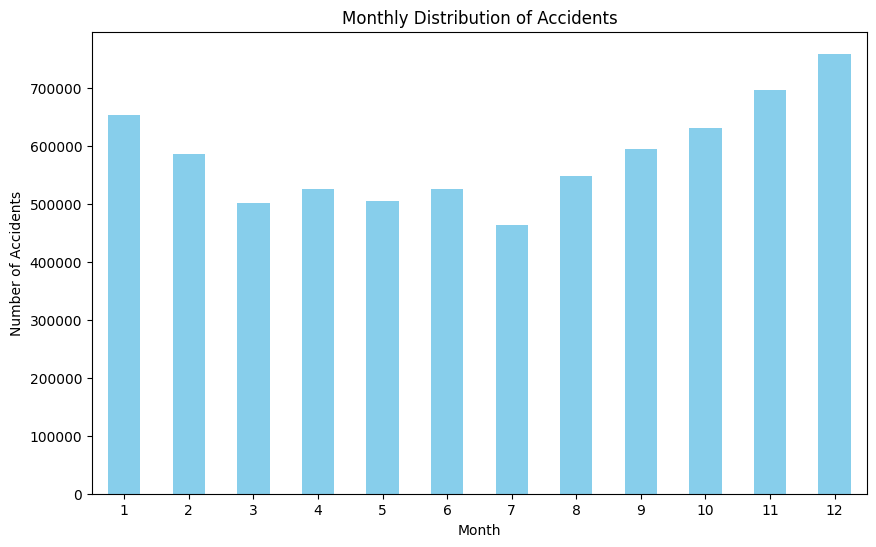

In [34]:
# Convert Start_Time to datetime with error handling
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract month from Start_Time
df['Month'] = df['Start_Time'].dt.month

# Group by month and count accidents
monthly_accidents = df.groupby('Month').size()

# Plotting monthly distribution
plt.figure(figsize=(10, 6))
monthly_accidents.plot(kind='bar', color='skyblue')
plt.title('Monthly Distribution of Accidents')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

The increase in accidents during November and December in the US is primarily due to adverse weather conditions such as snow, ice, and reduced daylight hours, leading to reduced visibility and slippery road surfaces, which increase the likelihood of collisions.

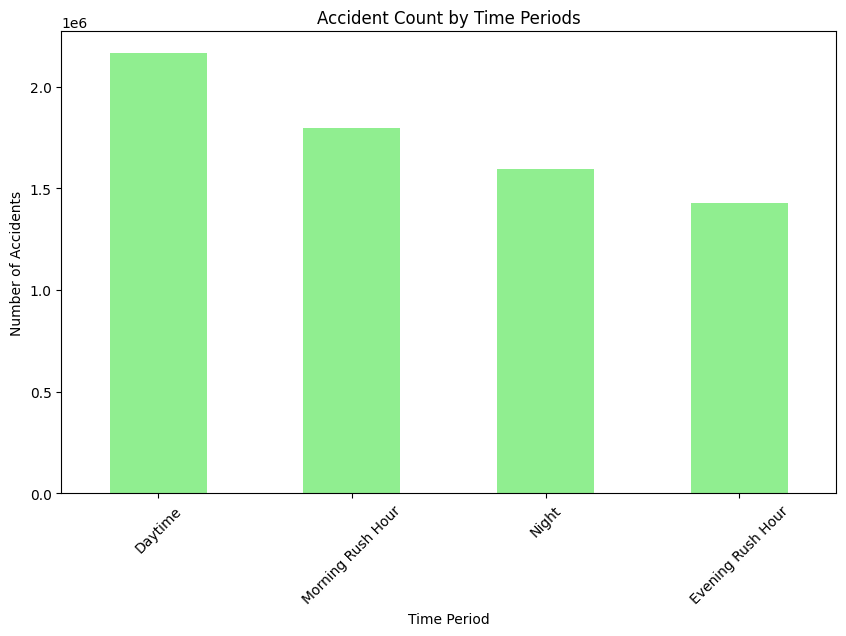

In [35]:
# Define time periods
def get_time_period(hour):
    if 6 <= hour < 10:
        return 'Morning Rush Hour'
    elif 16 <= hour < 19:
        return 'Evening Rush Hour'
    elif 0 <= hour < 6 or 19 <= hour <= 23:
        return 'Night'
    else:
        return 'Daytime'

# Apply time period classification
df['Time_Period'] = df['Start_Time'].dt.hour.apply(get_time_period)

# Group by time period and count accidents
time_period_counts = df['Time_Period'].value_counts()

# Plotting accident count by time periods
plt.figure(figsize=(10, 6))
time_period_counts.plot(kind='bar', color='lightgreen')
plt.title('Accident Count by Time Periods')
plt.xlabel('Time Period')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


Accidents during daytime and morning rush hour in the US are primarily due to increased vehicle volume and higher levels of commuter traffic, leading to congestion and reduced reaction times among drivers navigating complex road conditions and intersections during these busy periods.

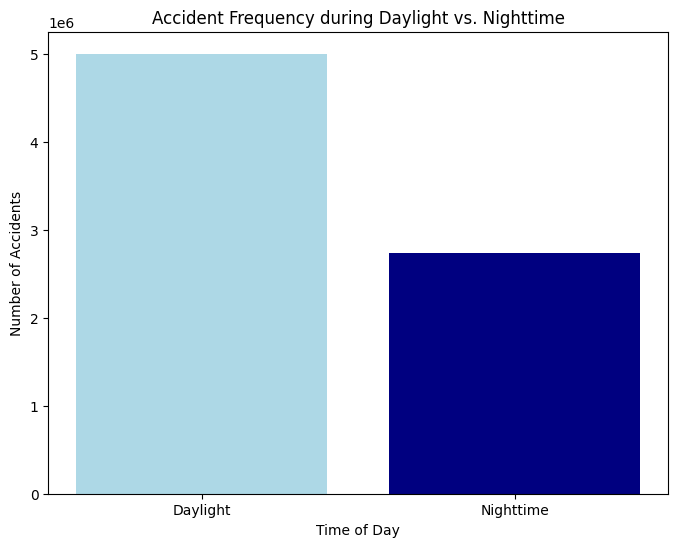

In [5]:
# Convert Start_Time to datetime with error handling
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Define daylight and nighttime based on hours (adjust as needed)
df['Is_Daylight'] = ((df['Start_Time'].dt.hour >= 6) & (df['Start_Time'].dt.hour < 18)).astype(int)

# Count accidents during daylight and nighttime
daylight_counts = df[df['Is_Daylight'] == 1].shape[0]
nighttime_counts = df[df['Is_Daylight'] == 0].shape[0]

# Plotting accident frequency during daylight vs. nighttime
plt.figure(figsize=(8, 6))
plt.bar(['Daylight', 'Nighttime'], [daylight_counts, nighttime_counts], color=['lightblue', 'navy'])
plt.title('Accident Frequency during Daylight vs. Nighttime')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()

Daytime accidents in the US often stem from heightened vehicle density and commuter traffic, causing congestion that challenges drivers with intricate road conditions and intersections, thereby reducing reaction times.